In [1]:
from osgeo import gdal
import numpy as np
import json
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
ds = gdal.Open('../data/IyoNou_NDVI7_0726.tif')
array = ds.ReadAsArray()

In [3]:
print array.shape
print array.dtype

(4, 10440, 10664)
uint8


In [4]:
new_array = np.zeros((10440, 10664, 3), dtype=np.float32)
new_array[:, :, 0] = array[0, :, :].astype(np.float32)
new_array[:, :, 0][new_array[:, :, 0] == 0] = np.nan

new_array[:, :, 1] = array[1, :, :].astype(np.float32)
new_array[:, :, 1][new_array[:, :, 1] == 0] = np.nan

new_array[:, :, 2] = array[2, :, :].astype(np.float32)
new_array[:, :, 2][new_array[:, :, 2] == 0] = np.nan

#new_array[:, :, 3] = array[3, :, :].astype(np.float32)

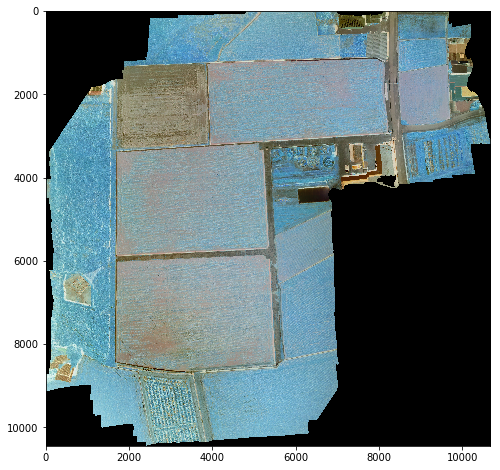

In [5]:
fig = plt.figure(figsize=(8, 8))

plt.imshow(new_array)

plt.show()

In [6]:
nominator = new_array[:, :, 0] - new_array[:, :, 2]
denominator = new_array[:, :, 0] + new_array[:, :, 2]

ndvi = denominator.copy()
index = denominator != 0
ndvi[:] = np.nan
ndvi[index] = nominator[index] / denominator[index]
del nominator, denominator

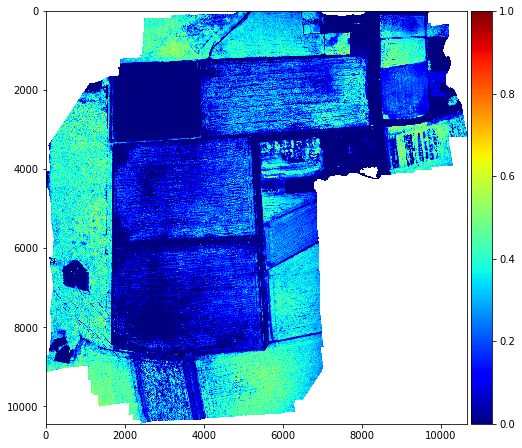

In [7]:
fig = plt.figure(figsize=(8, 8))

ax = plt.gca()
im = ax.imshow(ndvi, vmin=0, vmax=1, cmap=plt.cm.jet)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.show()

In [8]:
ndvi[np.isnan(ndvi)] = -9999

In [9]:
def Array2Tiff(out_name, Array, cols, rows, null, ds, GeoTransform):
    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(out_name, cols, rows,
                              1, gdal.GDT_Float32)
    outRaster.SetGeoTransform(GeoTransform)
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(Array)
    outband.SetNoDataValue(null)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromWkt(ds.GetProjectionRef())
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()